In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
os.chdir( '/Users/etmu9498/research/code/scripts/')
import tc_metadata
import helper_fns
import cloud_height
os.chdir( '/Users/etmu9498/research/code/scripts/statistics')
import cloud_height_pdfs_in_situ


TC Grace
Number of crl files: 11

TC Grace, 08-16, Eye Pass 1
TC Grace, 08-16, Eye Pass 2
TC Grace, 08-17, Eye Pass 1
TC Grace, 08-17, Eye Pass 2
TC Grace, 08-17, Eye Pass 3
TC Grace, 08-18, Eye Pass 1
TC Grace, 08-18, Eye Pass 2
TC Grace, 08-18, Eye Pass 3
TC Grace, 08-19, Eye Pass 1
TC Grace, 08-19, Eye Pass 2
TC Grace, 08-19, Eye Pass 3

TC Henri
Number of crl files: 5

TC Henri, 08-20, Eye Pass 1
TC Henri, 08-20, Eye Pass 3
TC Henri, 08-21, Eye Pass 1
TC Henri, 08-21, Eye Pass 2
TC Henri, 08-21, Eye Pass 3

TC Ida
Number of crl files: 5

TC Ida, 08-27, Eye Pass 1
TC Ida, 08-27, Eye Pass 2
TC Ida, 08-27, Eye Pass 3
TC Ida, 08-27, Eye Pass 7
TC Ida, 08-29, Eye Pass 1

TC Sam
Number of crl files: 7

TC Sam, 09-26, Eye Pass 1
TC Sam, 09-26, Eye Pass 2
TC Sam, 09-26, Eye Pass 3
TC Sam, 09-27, Eye Pass 2
TC Sam, 09-27, Eye Pass 3
TC Sam, 09-29, Eye Pass 1
TC Sam, 09-29, Eye Pass 2


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


tropical-depressions figure created.


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


tropical-storms figure created.


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


weak-hurricanes figure created.


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


strong-hurricanes figure created.


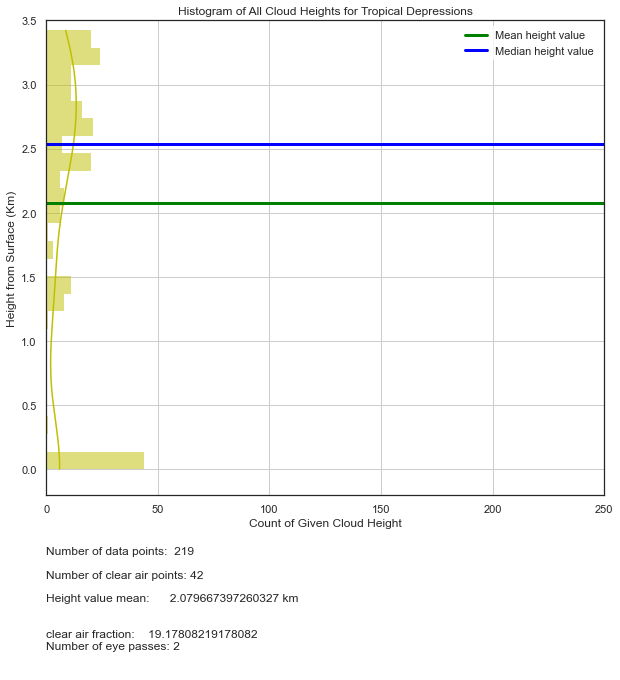

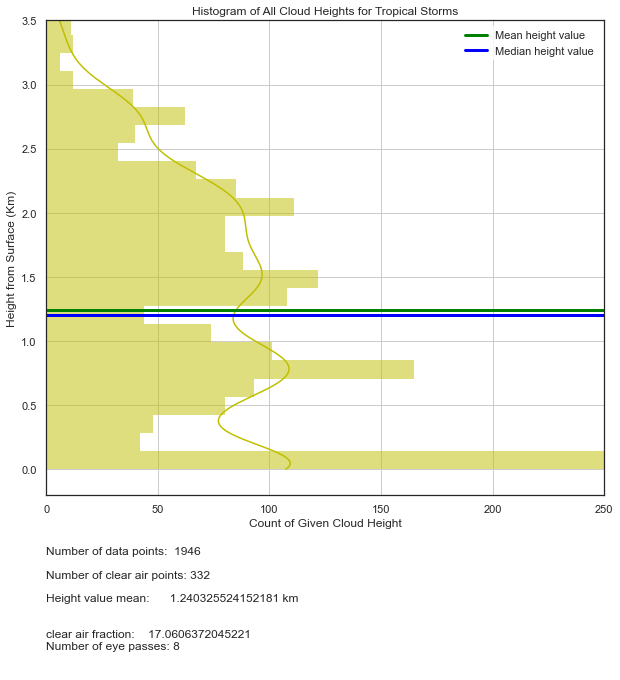

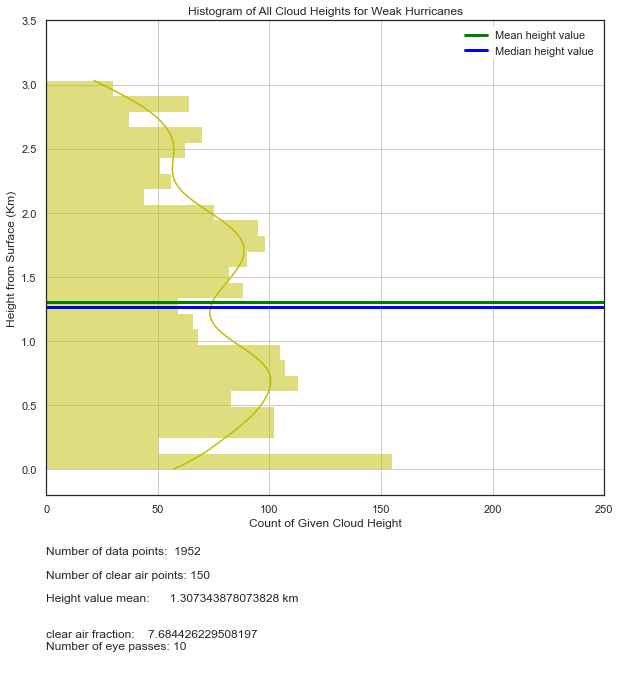

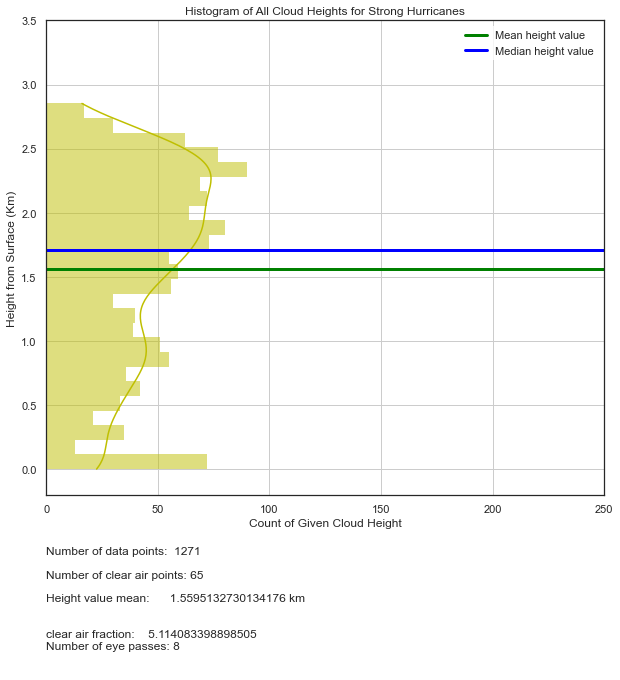

In [4]:
# new statistics on number of cloud layers per pass!
# run this to test out individual eyes: do the selected limits look ok?
# cloud_height_pdfs_in_situ.pdf_all_tc_eyes(tc='ida')

# new script to look at cloud height breakdowns based on intensity!
# run this with csu_poster_case=True to make pretty figures saved in csu folder
# run this with csu_poster_case=False to find statistics for table 2! 
# don't actually use these figures, they're kinda not pretty lol

cloud_height_pdfs_in_situ.cloud_height_vs_intensity( csu_poster_case=False) # True)

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


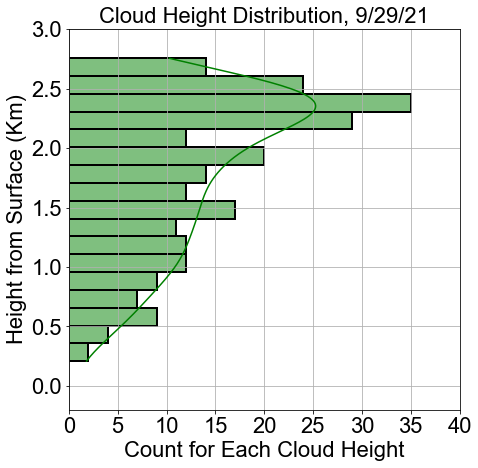

In [2]:
# code to make individual plot for figure 1b! 
# I put things here to have a pretty working example

# load data
tcname='sam'
metadata = tc_metadata.all_data( 'sam')
dataset = 5

# load data from new sources
tdr_name, new_crl_name = tc_metadata.choose_new_data( tcname, dataset)
new_crl_path = metadata[ 'um_crl_path']
eyewall_dists = metadata[ 'in_situ_eyewall_dists'][ dataset]

os.chdir( new_crl_path)
crl_data = xr.open_dataset( new_crl_name)
xaxis_data = crl_data.in_situ_distance.values

# find the indices and values in the crl distance dataset closest to the eyewall_dists limits
i1, x1 = helper_fns.closest_val( xaxis_data, eyewall_dists[ 0])
i2, x2 = helper_fns.closest_val( xaxis_data, eyewall_dists[ 1])

# find cloud top heights for values within the specified eye distance range
H, xaxis_value = cloud_height.find_cloud_heights(new_crl_name, -30, i1, i2, xaxis ='in-situ-dist', crl_path=new_crl_path, new_heights=True)

# remove 0 km heights from figure!
H = H[ np.where( H > .05)[0] ]


# make the figure!
helper_fns.change_font_sizes(small=22, medium=22 )
fig, a0 = plt.subplots(1, 1, figsize=(7, 7) )

# set the figure background (not plot background!) to transparent!!
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0)

# create a histogram
plt.sca( a0)

sns.set_theme(style="white", palette=None)
sns.set_context(rc = {'patch.linewidth': 0.0})

# sns.set_theme()
sns.histplot( y= H, kde=True, binwidth=.15, edgecolor='k', linewidth=2, color = 'g') # color = 'g', element='poly') # hist_kws=dict(edgecolor="black", linewidth=2))
a0.set_xlabel( 'Count for Each Cloud Height')
a0.set_ylabel( 'Height from Surface (Km)')
a0.set_title( "Cloud Height Distribution, 9/29/21", fontsize=22)
a0.set_ylim( [-.2, 3.0])
a0.set_xlim( [0, 40])
a0.grid(True)

# save the histogram
os.chdir( "/Users/etmu9498/research/figures/csu-poster/")
plt.savefig( "fig1b-sam-pdf.png", bbox_inches='tight', dpi=300 )


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


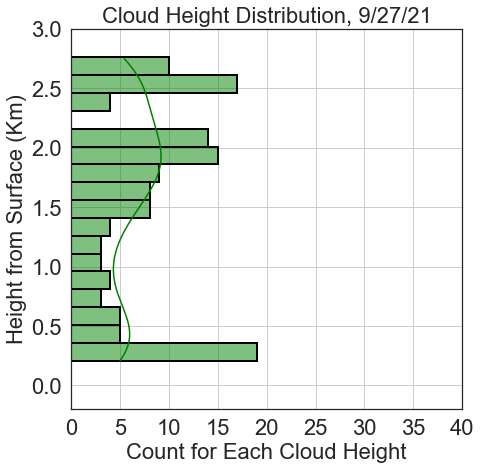

In [4]:
# The same as above, but just for a different eye pass! for the ONR progress report

# load data
tcname='sam'
metadata = tc_metadata.all_data( 'sam')
dataset = 3

# load data from new sources
tdr_name, new_crl_name = tc_metadata.choose_new_data( tcname, dataset)
new_crl_path = metadata[ 'um_crl_path']
eyewall_dists = metadata[ 'in_situ_eyewall_dists'][ dataset]

os.chdir( new_crl_path)
crl_data = xr.open_dataset( new_crl_name)
xaxis_data = crl_data.in_situ_distance.values

# find the indices and values in the crl distance dataset closest to the eyewall_dists limits
i1, x1 = helper_fns.closest_val( xaxis_data, eyewall_dists[ 0])
i2, x2 = helper_fns.closest_val( xaxis_data, eyewall_dists[ 1])

# find cloud top heights for values within the specified eye distance range
H, xaxis_value = cloud_height.find_cloud_heights(new_crl_name, -30, i1, i2, xaxis ='in-situ-dist', crl_path=new_crl_path, new_heights=True)

# remove 0 km heights from figure!
H = H[ np.where( H > .05)[0] ]


# make the figure!
helper_fns.change_font_sizes(small=22, medium=22 )
fig, a0 = plt.subplots(1, 1, figsize=(7, 7) )

# set the figure background (not plot background!) to transparent!!
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0)

# create a histogram
plt.sca( a0)

sns.set_theme(style="white", palette=None)
sns.set_context(rc = {'patch.linewidth': 0.0})

# sns.set_theme()
sns.histplot( y= H, kde=True, binwidth=.15, edgecolor='k', linewidth=2, color = 'g') # color = 'g', element='poly') # hist_kws=dict(edgecolor="black", linewidth=2))
a0.set_xlabel( 'Count for Each Cloud Height')
a0.set_ylabel( 'Height from Surface (Km)')
a0.set_title( "Cloud Height Distribution, 9/27/21", fontsize=22)
a0.set_ylim( [-.2, 3.0])
a0.set_xlim( [0, 40])
a0.grid(True)

# save the histogram
os.chdir( "/Users/etmu9498/research/figures/csu-poster/")
plt.savefig( "fig1b-sam-pdf-ex2.png", bbox_inches='tight', dpi=300 )
